# Bonus
#### As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

In [9]:
from sqlalchemy import create_engine
import pandas as pd
import psycopg2
import config
from matplotlib import pyplot as plt

In [6]:
# Import the SQL database into Pandas.
password = config.password
conn = psycopg2.connect(f'dbname=employee_db port=5432 user=postgres password={password}')

Text(0, 0.5, 'Number of Employees')

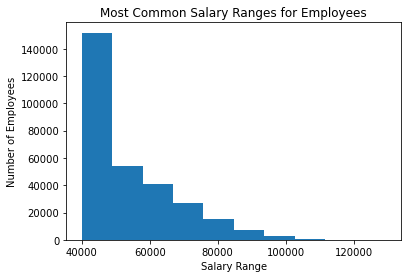

In [12]:
# Create a histogram to visualize the most common salary ranges for employees.
salaries = pd.read_sql('SELECT * FROM salaries', conn)
plt.hist(salaries['salary'], label='Salary Range')
plt.title('Most Common Salary Ranges for Employees')
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees')

In [17]:
# Create a bar chart of average salary by title.
salaries_titles = pd.read_sql('SELECT t.title AS "Title", s.salary\
                                FROM "salaries" AS s\
                                INNER JOIN "titles" AS t\
                                ON s.emp_no = t.emp_no;', conn)

DatabaseError: Execution failed on sql 'SELECT t.title AS "Title", s.salary                                FROM "salaries" AS s                                INNER JOIN "titles" AS t                                ON s.emp_no = t.emp_no;': column t.emp_no does not exist
LINE 1: ... AS t                                ON s.emp_no = t.emp_no;
                                                              ^
HINT:  Perhaps you meant to reference the column "s.emp_no".
